<a href="https://colab.research.google.com/github/dzkmrn/2141720076-pcvk-2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Week 10**

### Muhammad Dzaka Murran Rusid | 2141720076 | TI-3H



### Tugas Praktikum

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”. Kemudian import folder yang ada di Drive


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [4]:
pip install pytesseract

In [5]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.

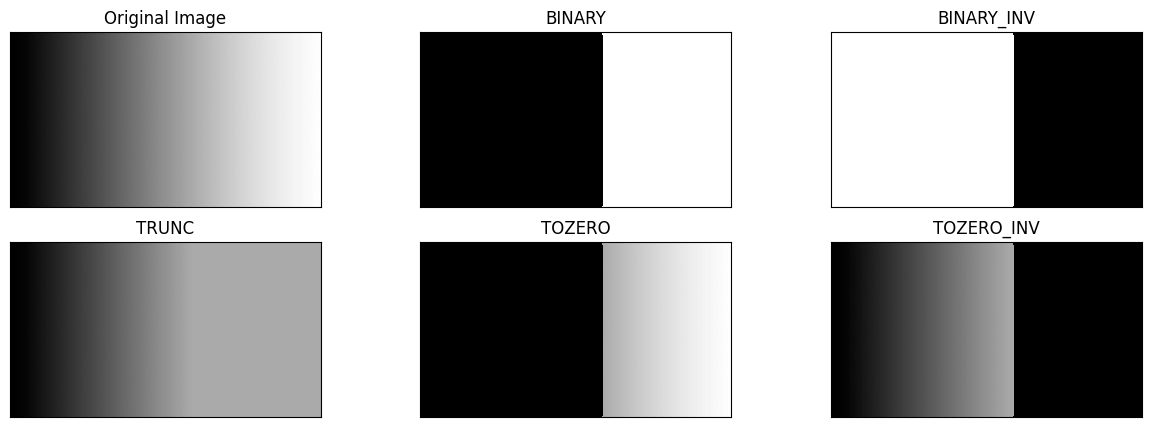

In [9]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/pcvk/minggu10/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-15-aecf08b74de3>:28: RuntimeWarning: invalid value encountered in double_scalars
  mean_below = np.sum(np.arange(0, t) * histogram[0:t]) / (prob_below * total_pixels)


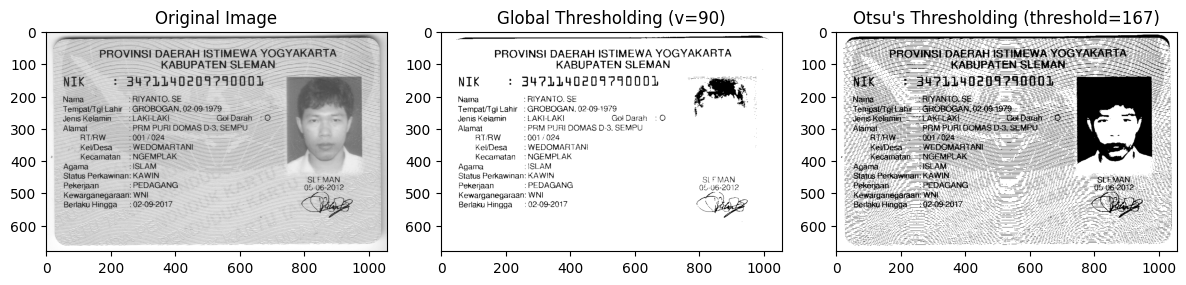

Global Threshold Value (v=90): 90
Otsu's Threshold Value: 167


In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('/content/drive/MyDrive/pcvk/ktp/ktp.png', cv2.IMREAD_GRAYSCALE)

# Define global threshold value (v=90)
global_threshold = 90

# Calculate the histogram of the image
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Calculate the total number of pixels in the image
total_pixels = image.shape[0] * image.shape[1]

# Initialize variables to store threshold and maximum variance (Otsu's)
max_variance, otsu_threshold = 0, 0

# Iterate through all possible thresholds (0-255)
for t in range(256):
    # Calculate the probability of pixels below and above the threshold
    prob_below = np.sum(histogram[0:t]) / total_pixels
    prob_above = np.sum(histogram[t:256]) / total_pixels

    # Calculate the mean values for pixels below and above the threshold
    mean_below = np.sum(np.arange(0, t) * histogram[0:t]) / (prob_below * total_pixels)
    mean_above = np.sum(np.arange(t, 256) * histogram[t:256]) / (prob_above * total_pixels)

    # Calculate the intra-class variance
    variance = prob_below * prob_above * (mean_below - mean_above) ** 2

    # Check if the variance is greater than the current maximum
    if variance > max_variance:
        max_variance = variance
        otsu_threshold = t

# Apply the global threshold and Otsu's threshold to the image
global_threshold_image = (image > global_threshold) * 255
otsu_threshold_image = (image > 167) * 255  # Change the threshold value to 167

# Create a 1x3 grid for displaying the images
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Global Thresholding
plt.subplot(1, 3, 2)
plt.imshow(global_threshold_image, cmap='gray')
plt.title(f'Global Thresholding (v={global_threshold})')

# Otsu's Thresholding
plt.subplot(1, 3, 3)
plt.imshow(otsu_threshold_image, cmap='gray')
plt.title(f"Otsu's Thresholding (threshold=167)")

plt.tight_layout()
plt.show()

# Print the threshold values
print("Global Threshold Value (v=90):", global_threshold)
print("Otsu's Threshold Value:", 167)

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

  a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

  b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

  c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
  yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
  histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
  dimasking warna putih yang akan dihitung histogramnya (dari contoh
  dibawah dinamakan dengan Citra Segment).

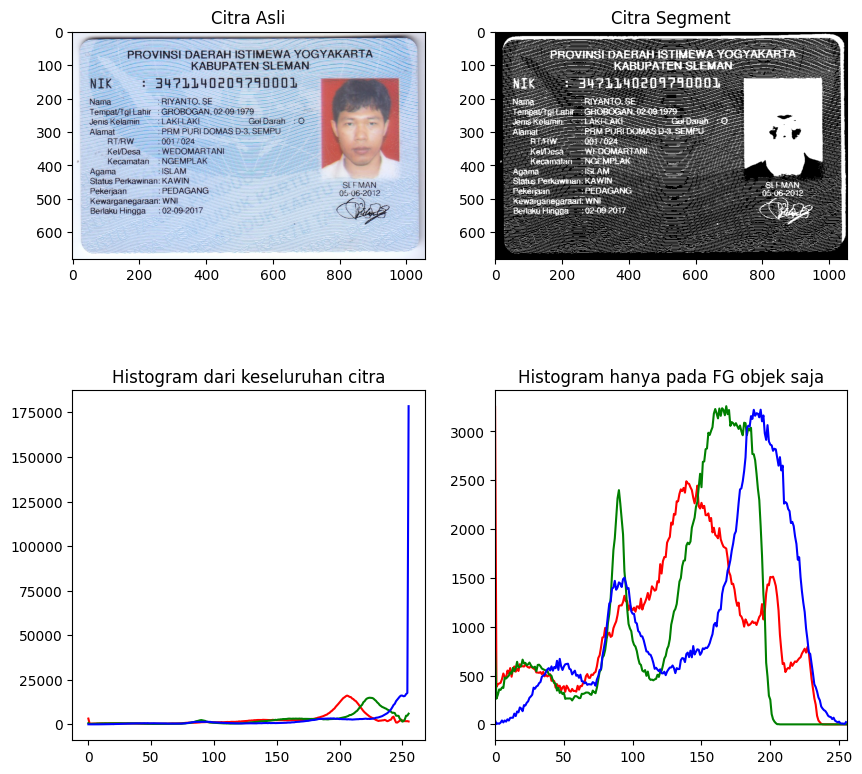

In [31]:
filename = ('/content/drive/MyDrive/pcvk/ktp/ktp.png')
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(mask, 'gray')
plt.title('Citra Segment')

color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist0 = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(2, 2, 3), plt.plot(hist0, color=col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img], [i], mask, [256], [0, 256])
    plt.subplot(2, 2, 4), plt.plot(hist1, color=col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0, 256])

plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

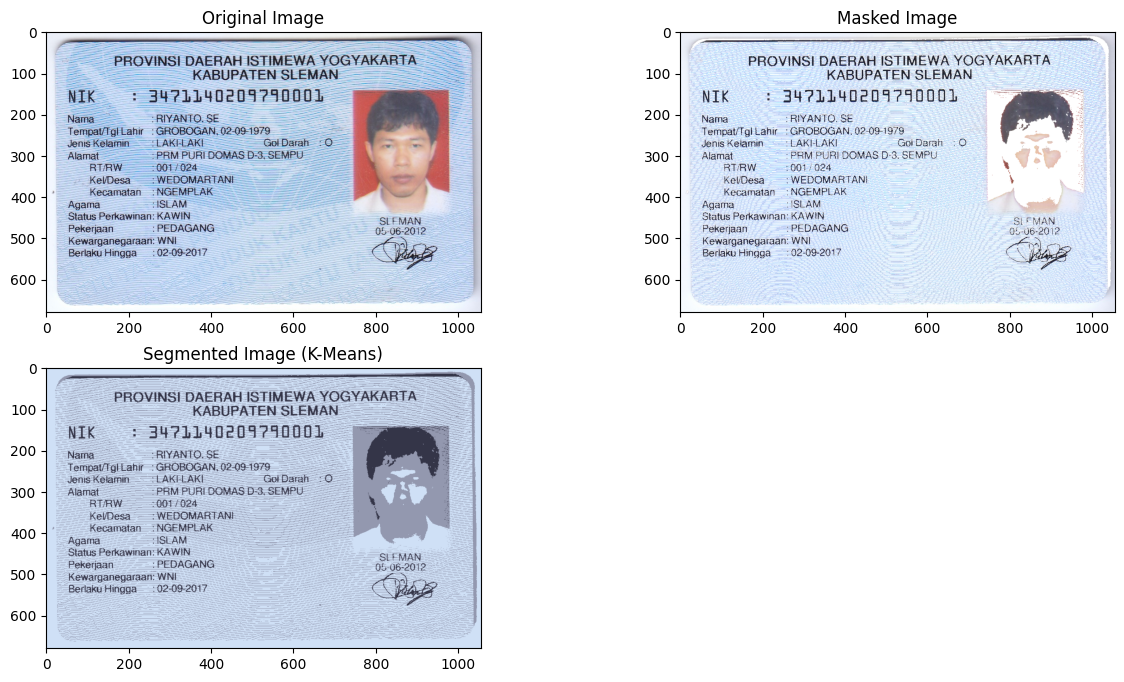

In [48]:
# Load the image
ktp = cv2.imread('/content/drive/MyDrive/pcvk/ktp/ktp.png')
ktp_rgb = cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Flatten the pixel values
pixel_values = ktp_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters (you can adjust this)

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(ktp_rgb)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2  # Adjust this value based on the cluster representing blue
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(ktp_rgb.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(ktp_rgb.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(ktp_rgb)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

E. Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang
telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7